# Experiments for the Clit Recommender

## Init

### Create Config

In [4]:
import ipywidgets as widgets
from IPython.display import display
from os.path import join
from clit_recommender import DATA_PATH
from clit_recommender.domain.datasets import Dataset
from clit_recommender.domain.metrics import MetricType
from clit_recommender.domain.systems import System
from clit_recommender.config import Config
from clit_recommender.util import display_with_layout

_default_config = Config()


# Widgets for each field in the Config class
epochs_widget = widgets.IntText(value=_default_config.epochs, description="Epochs:")
batch_size_widget = widgets.IntText(
    value=_default_config.batch_size, description="Batch Size:"
)
depth_widget = widgets.IntText(value=_default_config.depth, description="Depth:")
results_dir_widget = widgets.Text(
    value=_default_config.results_dir,
    description="Results Dir:",
)
lm_model_name_widget = widgets.Text(
    value=_default_config.lm_model_name, description="LM Model Name:"
)
device_widget = widgets.Dropdown(
    options=["cpu", "cuda"], value=_default_config.device, description="Device:"
)
experiment_name_widget = widgets.Text(value="", description="Experiment Name:")
model_widget = widgets.Text(value=_default_config.model, description="Model:")
load_best_graph_widget = widgets.Checkbox(
    value=_default_config.load_best_graph, description="Load Best Graph:"
)
threshold_widget = widgets.FloatSlider(
    value=_default_config.threshold,
    min=0.0,
    max=1.0,
    step=0.01,
    description="Threshold:",
)
datasets_widget = widgets.SelectMultiple(
    options=list(Dataset), description="Datasets:", value=list(Dataset)
)
systems_widget = widgets.SelectMultiple(
    options=list(System),
    description="Systems:",
    value=[
        System.BABEFLY,
        System.DBPEDIA_SPOTLIGHT,
        System.OPEN_TAPIOCA,
        System.REFINED_MD_PROPERTIES,
        System.REL_MD_PROPERTIES,
        System.SPACY_MD_PROPERTIES,
        System.TAGME,
        System.TEXT_RAZOR,
    ],
)
metric_type_widget = widgets.Dropdown(
    options=list(MetricType),
    value=_default_config.metric_type,
    description="Metric Type:",
)

md_modules_count_widget = widgets.IntText(
    value=_default_config.md_modules_count, description="MD Modules Count:"
)


# Function to create the config object
def create_config(b):
    global _config
    _config = Config(
        epochs=epochs_widget.value,
        batch_size=batch_size_widget.value,
        depth=depth_widget.value,
        results_dir=results_dir_widget.value,
        lm_model_name=lm_model_name_widget.value,
        device=device_widget.value,
        experiment_name=experiment_name_widget.value or None,
        model=model_widget.value,
        load_best_graph=load_best_graph_widget.value,
        threshold=threshold_widget.value,
        datasets=list(datasets_widget.value),
        systems=list(systems_widget.value),
        metric_type=metric_type_widget.value,
        md_modules_count=md_modules_count_widget.value,
    )
    print("Saved")
    print(_config)


# Button to trigger the creation of the config object
create_button = widgets.Button(description="Create Config")
create_button.on_click(create_config)

# Display all the widgets
display_with_layout(
    epochs_widget,
    batch_size_widget,
    depth_widget,
    results_dir_widget,
    lm_model_name_widget,
    device_widget,
    experiment_name_widget,
    model_widget,
    load_best_graph_widget,
    threshold_widget,
    datasets_widget,
    systems_widget,
    metric_type_widget,
    md_modules_count_widget,
    create_button,
)

IntText(value=5, description='Epochs:', layout=Layout(width='90%'))

IntText(value=1, description='Batch Size:', layout=Layout(width='90%'))

IntText(value=1, description='Depth:', layout=Layout(width='90%'))

Text(value='/Users/niladi/workspace/seminar-kdd/code/data/results', description='Results Dir:', layout=Layout(…

Text(value='roberta-large', description='LM Model Name:', layout=Layout(width='90%'))

Dropdown(description='Device:', layout=Layout(width='90%'), options=('cpu', 'cuda'), value='cpu')

Text(value='', description='Experiment Name:', layout=Layout(width='90%'))

Text(value='ClitRecommenderModelOneDepth', description='Model:', layout=Layout(width='90%'))

Checkbox(value=True, description='Load Best Graph:', layout=Layout(width='90%'))

FloatSlider(value=0.5, description='Threshold:', layout=Layout(width='90%'), max=1.0, step=0.01)

SelectMultiple(description='Datasets:', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='90%'), options=(<Datase…

SelectMultiple(description='Systems:', index=(0, 2, 4, 5, 7, 8, 9, 10), layout=Layout(width='90%'), options=(<…

Dropdown(description='Metric Type:', layout=Layout(width='90%'), options=(<MetricType.F1: 'F1'>, <MetricType.P…

IntText(value=11, description='MD Modules Count:', layout=Layout(width='90%'))

Button(description='Create Config', layout=Layout(width='90%'), style=ButtonStyle())

Saved
Config(epochs=5, batch_size=1, depth=1, results_dir='/Users/niladi/workspace/seminar-kdd/code/data/results', lm_model_name='roberta-large', device='cpu', experiment_name='Clit-Recommender-Experiment-1726498422-f1', model='ClitRecommenderModelOneDepth', load_best_graph=True, threshold=0.5, datasets=[<Dataset.MED_MENTIONS: label='MedMentions', uri='http://med-mentions.niladi.de/all', filename='medmentions.ttl'>, <Dataset.AIDA_YAGO2: label='AidaConllYago', uri='https://aifb.kit.edu/conll', filename='AIDA-YAGO2-dataset.tsv_nif'>, <Dataset.KORE_50: label='Kore50', uri='http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv', filename='KORE_50_DBpedia.ttl'>, <Dataset.NEWS_100: label='News100', uri='http://aksw.org/N3/News-100', filename='News-100.ttl'>, <Dataset.REUTERS_128: label='Reuters128', uri='http://aksw.org/N3/Reuters-128', filename='Reuters-128.ttl'>, <Dataset.RSS_500: label='Rss500', uri='http://aksw.org/N3/RSS-500', filename='RSS-500.ttl'>], systems=[<Syste

### Create Exporter

In [18]:
from clit_recommender.eval.exporter import Exporter


_exporter = Exporter("/Users/niladi/workspace/seminar-kdd/paper")

## Analyse

### Text Lengths of Input Size

Analyzing the text and token lenghts for choosing the correct language model.

In [ ]:
from clit_recommender.data.dataset.clit_result_dataset import ClitResultDataset


recommender = ClitResultDataset(_config)
texts = []
for i in recommender:
    for j in i:
        texts.append(j.context_text)

        # Calculate the text lengths

#### Text Length

In [ ]:
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in texts]

# Create a histogram
plt.hist(text_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

#### Token Length

In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


tokenizer = AutoTokenizer.from_pretrained(_config.lm_model_name)

token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

# Create a histogram
plt.hist(token_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Tokens Lengths")
plt.show()

token_overflows = list(
    filter(lambda tl: tl > tokenizer.model_max_length, token_lengths)
)
print("overflown:", len(token_overflows), "/", len(token_lengths))

## Best Graphs Evaluation

Evaluating the different best graphs which are extracted

### Create for Config

In [ ]:
from clit_recommender.data.best_graphs.factory import BestGraphFactory

BestGraphFactory(_config).create()

### Example for Best Graph

In [6]:
from clit_recommender.data.best_graphs.io import BestGraphIO


lmdb = BestGraphIO(_config).load_lmdb()

lmdb.get("https://aifb.kit.edu/conll/18#char=0,882")

[[[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0]]]

### Data Quality

Evaluate which of the datapoints does not have any mentions or which does not have any generated results

In [7]:
from copy import deepcopy
from clit_recommender.data.best_graphs.io import BestGraphIO
from clit_recommender.data.dataset.clit_result_dataset import ClitResultDataset

cfg = deepcopy(_config)
cfg.batch_size = 1000
best_graphs_dict = BestGraphIO(cfg).load_dict()

for batch in ClitResultDataset(cfg):
    for data_row in batch:
        val = best_graphs_dict.get(data_row.context_uri)
        if val is None or len(val) == 0:
            print(data_row)

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
DataRow(context_uri='https://aifb.kit.edu/conll/734#char=0,624', context_text="BALANCE-Water Dist 1 Johnson Cty , Kan .  , at $ 11 mln .  WATER DISTRICT 1 OF JOHNSON CO .  , KS  RE : $ 45,020,000  WATER REVENUE BONDS  $ 22,040,000 SER .  1996A  $ 22,980,000 RFDG , SER .  1996B  MOODY 'S : Aa S&P : AA+  Delivery Date : 09/05/1996 ( FIRM )  06/01 12/01  MATURITY SER A SER B SER A SER B  -------------------------------------------------------------  1998 665M 840M 570M  2000 - - 605M  2001 - 70M -  2002 - 895M 600M  2003 705M - 795M  2004 655M 90M 965M  2009 65M - -  2010 60M - 100M  2011 30M - 90M  2012 20M - 35M  TOTAL : 11,450  A.G. Edwards & Sons , Inc .  -- U.S. Municipal D

### Amount of Systems in Best Pipeline

In [19]:
from collections import Counter
from clit_recommender.data.best_graphs.io import BestGraphIO
from clit_recommender.domain.datasets import DatasetSplitType


# Create a list of labels for the x-axis
labels = [
    "Single",
    "Intersection or Majority Voting",
    "Union",
    "Intersection",
    "Majority Voting",
]

# Create a list of colors for the stacked bars
colors = [
    "#00876C",
    "#4664aa",
    "#fce500",
    "#a3107c",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]


def get_best_graphs(config: Config, split_type: DatasetSplitType = None):
    # TODO Datset Split Type einbaunen
    return BestGraphIO(config).load_dict()


def get_graph_data(config: Config):

    best_graphs = get_best_graphs(config)

    graphs = []

    for key, value in best_graphs.items():
        if value is None:
            print("NONE ")
            continue
        for v in value:
            graphs.append(tuple(map(tuple, v)))

    element_counts = Counter(graphs)
    amount = {i + 1: {} for i in range(7)}

    all_values = 0

    for key, value in element_counts.items():
        _a = sum(map(sum, key))
        # print(value, _a, key)

        _val = value

        if _a == 1.0:
            _val /= 3  # on single majority, intersection and uninon are the same
            _key = "Single"
        elif _a == 2.0 and sum([k[1] for k in key]) == 2.0:
            _val /= 2  # on 2 majority and intersection are the same
            _key = "Intersection or Majority Voting"
        elif sum([k[0] for k in key]) >= 0:
            _key = "Union"
        elif sum([k[1] for k in key]) >= 0:
            _key = "Intersection"
        elif sum([k[2] for k in key]) >= 0:
            _key = "Majority Voting"

        if _key not in amount[_a]:
            amount[_a][_key] = _val
        else:
            amount[_a][_key] += _val

        all_values += _val

    len(element_counts)

    print(amount)
    print(all_values)

    return amount

#### Current Config as Plot

{1: {'Single': 1286.9999999999993}, 2: {'Intersection or Majority Voting': 852.0, 'Union': 2826}, 3: {'Union': 2934}, 4: {'Union': 628}, 5: {'Union': 202}, 6: {'Union': 60}, 7: {}}
8789.000000000002


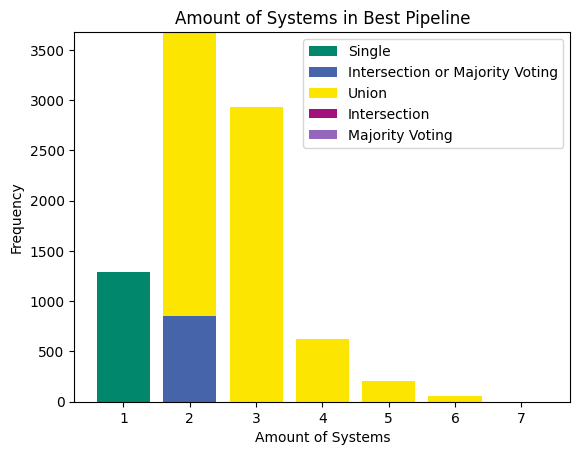

In [20]:
import matplotlib.pyplot as plt

amount = get_graph_data(_config)

# Extract the keys and values from the 'amount' dictionary
keys = list(amount.keys())
values = list(amount.values())


# Create a list of bottom values for the stacked bars
bottom = [0] * len(keys)

# Plot the stacked bars
for i in range(len(labels)):
    plt.bar(
        keys,
        [v.get(labels[i], 0) for v in values],
        bottom=bottom,
        label=labels[i],
        color=colors[i],
    )
    bottom = [
        bottom[j] + [v.get(labels[i], 0) for v in values][j] for j in range(len(keys))
    ]

# Add labels and title to the plot
plt.xlabel("Amount of Systems")
plt.ylabel("Frequency")
plt.title("Amount of Systems in Best Pipeline")

# Add legend to the plot
plt.legend()


_exporter.plt_to_png(
    f"amount_of_systems_in_best_pipeline_{_config.metric_type.name.lower()}"
)
# Show the plot
plt.show()

In [ ]:
element_counts

### Cross Metric

From the given Config, Iterate over the three Metrics for better comparision.

{1: {'Single': 1286.9999999999993}, 2: {'Intersection or Majority Voting': 852.0, 'Union': 2826}, 3: {'Union': 2934}, 4: {'Union': 628}, 5: {'Union': 202}, 6: {'Union': 60}, 7: {}}
8789.000000000002
{1: {'Single': 1254.9999999999998}, 2: {'Intersection or Majority Voting': 2949.0, 'Union': 5943}, 3: {'Union': 2258}, 4: {'Union': 874}, 5: {'Union': 140}, 6: {'Union': 65}, 7: {'Union': 2}}
13486.0
{1: {'Single': 4463.0}, 2: {'Union': 5195}, 3: {'Union': 2712}, 4: {'Union': 1012}, 5: {'Union': 153}, 6: {'Union': 9}, 7: {}}
13544.000000000002


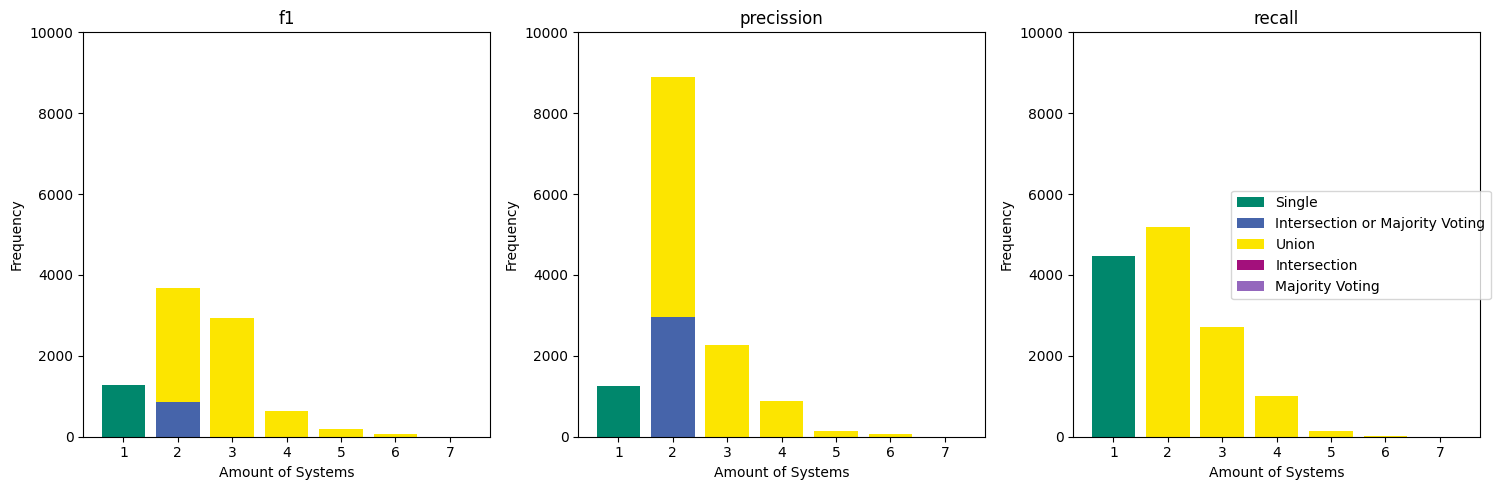

In [21]:
from copy import deepcopy
import matplotlib.pyplot as plt

cfg = deepcopy(_config)
types = list(MetricType)
fig, axs = plt.subplots(1, len(types), figsize=(15, 5))


for idx, metric in enumerate(types):
    cfg.metric_type = metric
    amount = get_graph_data(cfg)

    # Extract the keys and values from the 'amount' dictionary
    keys = list(amount.keys())
    values = list(amount.values())

    # Create a list of bottom values for the stacked bars
    bottom = [0] * len(keys)

    # Plot the stacked bars
    for i in range(len(labels)):
        axs[idx].bar(
            keys,
            [v.get(labels[i], 0) for v in values],
            bottom=bottom,
            label=labels[i],
            color=colors[i],
        )
        bottom = [
            bottom[j] + [v.get(labels[i], 0) for v in values][j]
            for j in range(len(keys))
        ]

    axs[idx].set_ylim(0, 10000)
    # Add labels and title to the plot
    axs[idx].set_xlabel("Amount of Systems")
    axs[idx].set_ylabel("Frequency")
    axs[idx].set_title(metric.lower())

# Add legend to the plot
fig.legend(labels, loc="right")

# Adjust layout
plt.tight_layout()

_exporter.plt_to_png(f"amount_of_systems_in_best_pipeline_all")
# Show the plot
plt.show()

### Heatmap

  0%|          | 0/6563 [00:00<?, ?it/s]

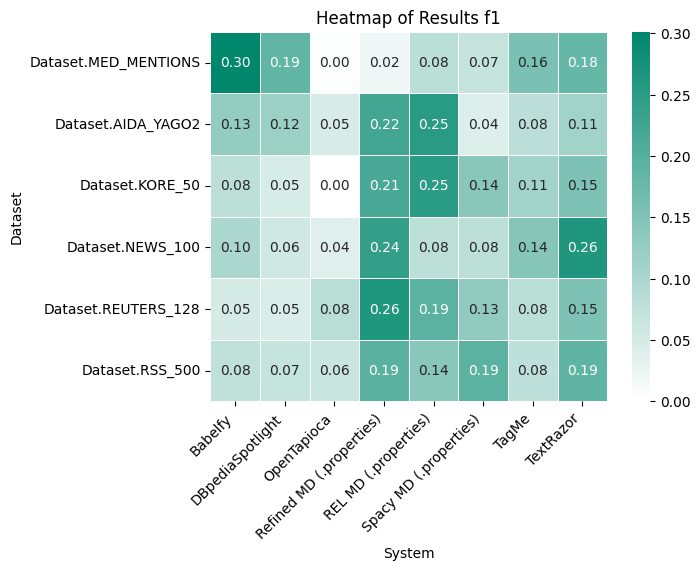

  0%|          | 0/6563 [00:00<?, ?it/s]

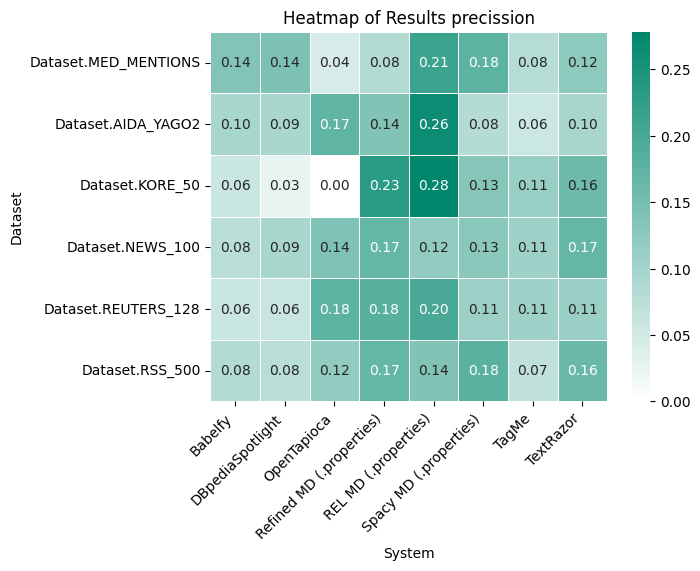

  0%|          | 0/6563 [00:00<?, ?it/s]

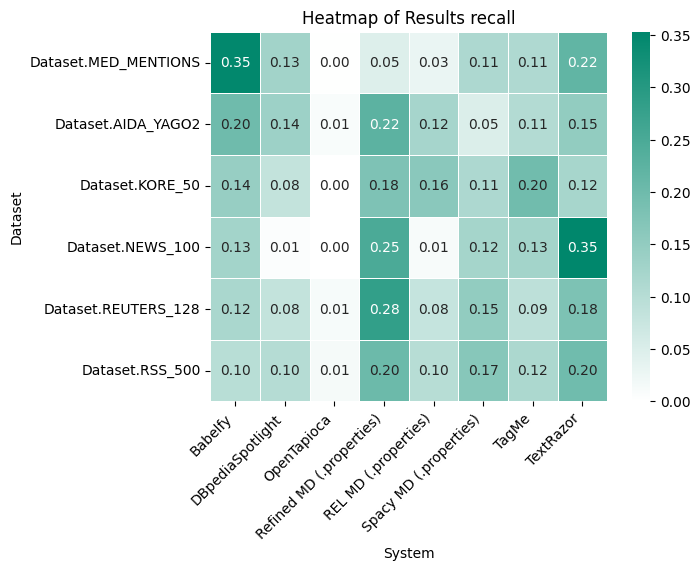

In [22]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

from tqdm.auto import tqdm

from clit_recommender.domain.clit_mock.graph import Graph
from clit_recommender.domain.datasets import Dataset
from clit_recommender.data.best_graphs.io import BestGraphIO
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
from copy import deepcopy

from clit_recommender.util import l1_normalize_tuple

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", ["#FFFFFF", "#00876C"]
)  # Create custom colormap


cfg = deepcopy(_config)
for metric_type in list(MetricType):
    cfg.metric_type = metric_type
    graphs = get_best_graphs(cfg)

    # here is no need for usage analysis, becuase there is only the last layer used systems looked at
    systems_used = defaultdict(list)

    dataset: Dataset
    for collection_uri, best_graphs in tqdm(graphs.items()):
        key_dataset = None
        for dataset in _config.datasets:
            if collection_uri.startswith(dataset.uri):
                key_dataset = dataset
                break
        if key_dataset is None:
            raise Exception("Dataset not found")
        s = set()
        for best_graph in best_graphs:
            graph = Graph.create(_config, best_graph)
            s.add(
                graph.get_last_level_tuple_roundet()[0]
            )  # Todo: if depth >= search for all systems used not only in the last layer
        systems_used[key_dataset].extend(s)

    systems_used_reduced = {
        key: l1_normalize_tuple(np.sum(np.array(value), axis=0))
        for key, value in systems_used.items()
    }

    df = pd.DataFrame.from_dict(systems_used_reduced, orient="index")
    df.columns = [system.label for system in System]
    df.index.name = "Dataset"

    df = df.loc[:, (df != 0).any(axis=0)]

    ax = sns.heatmap(
        df, linewidth=0.5, cmap=custom_cmap, annot=True, fmt=".2f", cbar=True
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    plt.xlabel("System")
    plt.ylabel("Dataset")
    plt.title("Heatmap of Results " + metric_type.value.lower())

    _exporter.plt_to_png(f"heatmap_of_results_{metric_type.value.lower()}")

    # plt.tight_layout()
    plt.show()

  0%|          | 0/6563 [00:00<?, ?it/s]

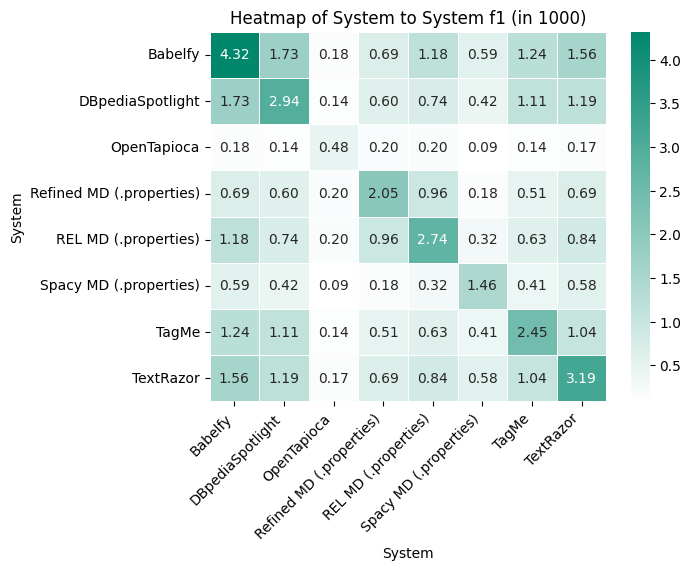

  0%|          | 0/6563 [00:00<?, ?it/s]

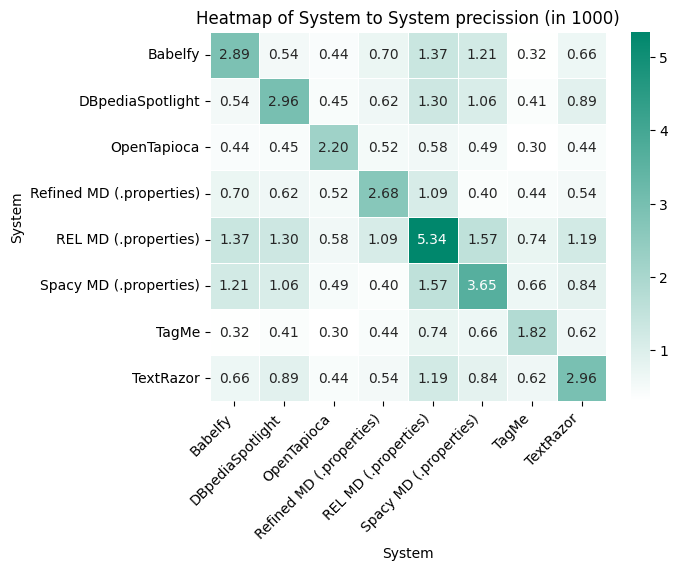

  0%|          | 0/6563 [00:00<?, ?it/s]

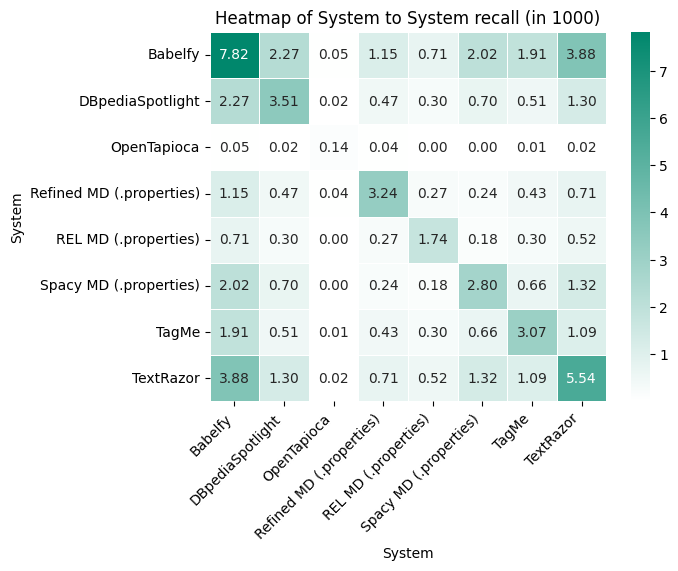

In [23]:
from clit_recommender.eval.heatmap import create_systems_x2_used


cfg = deepcopy(_config)
for metric_type in list(MetricType):
    cfg.metric_type = metric_type
    graphs = get_best_graphs(cfg)

    systems = []
    for best_graphs in tqdm(graphs.values()):
        s = set()
        for best_graph in best_graphs:
            graph = Graph.create(_config, best_graph)
            s.add(
                graph.get_last_level_tuple_roundet()[0]
            )  # Todo: if depth >= search for all systems used not only in the last layer
        systems.extend(s)
    create_systems_x2_used(systems, metric_type, _exporter)

## Train

In [ ]:
from time import time
from os.path import join

from clit_recommender.run_all_experiments import run_all_experiments

if _config.results_dir == join(DATA_PATH, "results"):
    _config.results_dir = join(DATA_PATH, "results_full" + str(int(time())))
    print("Changed to", _config.results)

run_all_experiments(_config)

## Results

### Expeirment

Select a single Element and get its Results

In [10]:
from operator import attrgetter
from typing import Callable, Iterable, List, Tuple, Type, TypeAlias, Union
from clit_recommender.domain.metrics import Metrics, MetricsHolder
from clit_recommender.config import Config
from clit_recommender.util import iterate_dirs
from os.path import join, exists
from IPython.display import display, clear_output, JSON
from ipywidgets.widgets import Dropdown, interact, Layout


Experiment: TypeAlias = Tuple[List[Config], Union[Metrics, MetricsHolder]]


def load_from_path_factory(
    config_names: List[str] = ["config.json"],
    metric_type: Union[Type[Metrics], Type[MetricsHolder]] = MetricsHolder,
) -> Callable[[str], Experiment]:

    def apply(path: str) -> Experiment:
        configs = []
        for cfg_name in config_names:
            with open(join(path, cfg_name), "r") as file:
                json = file.read()
                configs.append(Config.from_json(json))
        metrics_path = join(path, "metrics.json")
        if exists(metrics_path):
            with open(metrics_path, "r") as file:
                metrics = metric_type.from_json(file.read())
        else:
            metrics = None
        return configs, metrics

    return apply


def get_info(config: Config, metrics: Metrics) -> str:

    return f"""
{config.experiment_name} 
{config.metric_type} {metrics.get_metric(config.metric_type)}
datasets: {' '.join(map(attrgetter('label'),config.datasets))}
systems: {' '.join(map(attrgetter('label'), config.systems))}
"""


def get_metrics(metrics: Union[Metrics, MetricsHolder]) -> Metrics:
    if type(metrics) == MetricsHolder:
        return metrics.get_best_epoch().get_single_result()
    return metrics


def widget_display(experiments: List[Experiment]):
    dropdown = Dropdown(
        options=[
            (get_info(cfg[0], get_metrics(metrics)), idx)
            for idx, (cfg, metrics) in enumerate(experiments)
        ],
        description="Experiment:",
        layout=Layout(width="90%"),
    )

    def widget_change(idx):
        clear_output()

        cfgs, metrics = experiments[idx]
        res: Metrics = get_metrics(metrics)

        for cfg in cfgs:
            display(cfg.to_dict())
        print(res.get_summary())

    interact(widget_change, idx=dropdown)

In [3]:
_config.results_dir = "/Users/niladi/workspace/seminar-kdd/code/data/results_full"

#### Single System

In [11]:
from clit_recommender.util import flat_map, iterate_dirs


widget_display(
    list(
        map(
            load_from_path_factory(metric_type=Metrics),
            list(
                flat_map(
                    iterate_dirs, iterate_dirs(f"{_config.results_dir}/single_system/")
                )
            ),
        )
    )
)

AttributeError: 'str' object has no attribute 'items'

#### Full Training

In [4]:
widget_display(
    list(
        filter(
            lambda experiment: experiment[1] is not None,
            map(
                load_from_path_factory(),
                iterate_dirs(f"{_config.results_dir}/experiments"),
            ),
        )
    )
)

interactive(children=(Dropdown(description='Experiment:', layout=Layout(width='90%'), options=(('\nClit-Recomm…

#### Cross Training

# Result Matrix

In [ ]:
import itertools
from clit_recommender.process.single_system import SingleSystem
from clit_recommender.process.training import train
from clit_recommender.data.graph_db_wrapper import GraphDBWrapper
from clit_recommender.domain.datasets import DatasetEnum
from clit_recommender.config import Config
from tqdm.auto import tqdm

graph_db_wrapper: GraphDBWrapper

systems_used = GraphDBWrapper(list(DatasetEnum)).get_all_systems()
systems_used.append("ClitRecommender")

datasets_dict = {}

for e in DatasetEnum:
    datasets_dict[e.name] = [e]

datasets_dict["ALL"] = list(DatasetEnum)
result_dict = {}

for (dataset_name, datasets), system in tqdm(
    list(itertools.product(datasets_dict.items(), systems_used))
):
    if system == "ClitRecommender":
        result = train(Config(datasets=datasets), False)
    else:
        result = SingleSystem(datasets, False).run(system)
    result_dict[(dataset_name, system)] = result


result_dict

In [35]:
import pandas as pd
from os.path import exists, join
from os import mkdir


def get_pandas(function_name: str) -> pd.DataFrame:

    f1 = {key: getattr(obj, function_name)() for key, obj in result_dict.items()}

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(f1, orient="index")

    # Reset the index to split the tuple into separate columns
    df.index = pd.MultiIndex.from_tuples(df.index)
    df = df.unstack().fillna("")

    # Optional: Rename columns and index
    df.columns = df.columns.droplevel(0)
    df.index.name = "Dataset"
    df.columns.name = "System"

    df.columns = [str(col).split("/")[-1] for col in df.columns]

    return df


f1 = get_pandas("get_f1")
precision = get_pandas("get_precision")
recall = get_pandas("get_recall")

to_latex(f1, "all_f1.tex")
to_latex(precision, "all_precision.tex")
to_latex(recall, "all_recall.tex")

<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\e'
<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\e'
/var/folders/fg/bk_tst354nj9q3cg77c38d_r0000gn/T/ipykernel_79396/662191212.py:41: SyntaxWarning: invalid escape sequence '\c'
  """
/var/folders/fg/bk_tst354nj9q3cg77c38d_r0000gn/T/ipykernel_79396/662191212.py:41: SyntaxWarning: invalid escape sequence '\l'
  """
/var/folders/fg/bk_tst354nj9q3cg77c38d_r0000gn/T/ipykernel_79396/662191212.py:41: SyntaxWarning: invalid escape sequence '\e'
  """
/var/folders/fg/bk_tst354nj9q3cg77c38d_r0000gn/T/ipykernel_79396/662191212.py:41: SyntaxWarning: invalid escape sequence '\c'
  """
/var/folders/fg/bk_tst354nj9q3cg77c38d_r0000gn/T/ipykernel_79396/662191212.py:41: SyntaxWarning: invalid escape sequence '\l'
  """
/var/folders/fg/bk_tst354nj9q3cg77

NameError: name 'result_dict' is not defined